In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
from sklearn.manifold import TSNE


In [3]:
# data from sklearn datasets
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

# Extract data & target from the dataset
pixel_data, targets = data
targets = targets.astype(int)

In [4]:
print("Shape of Pixel data : {}".format(pixel_data.shape))

Shape of Pixel data : (70000, 784)


In [5]:
pixel_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_3000 = pixel_data[0:3000]


In [7]:
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_3000)

In [8]:
targets_3000=targets[0:3000]

In [9]:
tsne_data = np.vstack((tsne_data.T,targets_3000)).T

In [10]:
tsne_data

array([[ -1.31352758,  33.58281708,   5.        ],
       [ 53.66096497,  34.07260895,   0.        ],
       [-53.73473358,  31.99702263,   4.        ],
       ...,
       [-37.77589417, -19.1940136 ,   9.        ],
       [ 27.19147873, -48.53210449,   1.        ],
       [-10.45658684,  18.65345955,   5.        ]])

In [11]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','targets_3000'))

In [12]:
tsne_df

,dim_1,dim_2,targets_3000
0,-1.313528,33.582817,5.0
1,53.660965,34.072609,0.0
2,-53.734734,31.997023,4.0
3,-14.517299,-50.807465,1.0
4,-41.882965,8.706813,9.0
...,...,...,...
2995,-50.371117,-22.047247,7.0
2996,47.947952,36.911198,0.0
2997,-37.775894,-19.194014,9.0
2998,27.191479,-48.532104,1.0


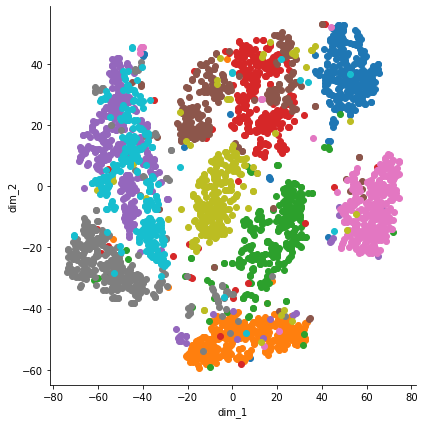

In [13]:
sns.FacetGrid(tsne_df,hue="targets_3000",size=6).map(plt.scatter,'dim_1','dim_2')
plt.show()

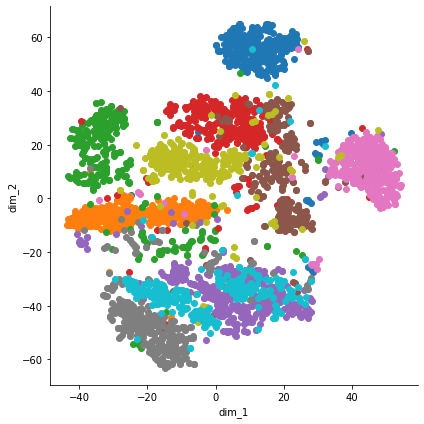

In [14]:
model = TSNE(n_components=2,random_state=0,perplexity=50)
tsne_data = model.fit_transform(data_3000)

tsne_data = np.vstack((tsne_data.T,targets_3000)).T

tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','targets_3000'))


sns.FacetGrid(tsne_df,hue="targets_3000",size=6).map(plt.scatter,'dim_1','dim_2')
plt.show()

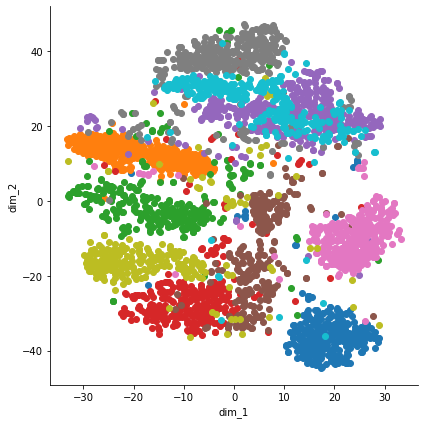

In [15]:
model2 = TSNE(n_components=2,random_state=0,perplexity=100, n_iter=5000)
tsne_data = model2.fit_transform(data_3000)

tsne_data = np.vstack((tsne_data.T,targets_3000)).T

tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','targets_3000'))


sns.FacetGrid(tsne_df,hue="targets_3000",size=6).map(plt.scatter,'dim_1','dim_2')
plt.show()

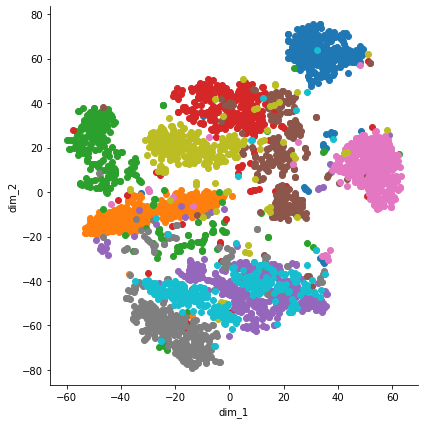

In [16]:
model2 = TSNE(n_components=2,random_state=0,perplexity=50, n_iter=5000)
tsne_data = model2.fit_transform(data_3000)

tsne_data = np.vstack((tsne_data.T,targets_3000)).T

tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','targets_3000'))


sns.FacetGrid(tsne_df,hue="targets_3000",size=6).map(plt.scatter,'dim_1','dim_2')
plt.show()